# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

In [3]:
!pwd

/c/Users/Curtis/Documents/SpringboardGuidedCapstone


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [4]:
step3_output = pd.read_csv(r"C:/Users/Curtis/Documents/SpringboardGuidedCapstone/data/step3_output.csv")
step3_outputdf = step3_output.drop(step3_output.columns[1], axis=1)
step3_outputdf.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
0,Hilltop Ski Area,2090,294,0,0,0,0,0,1,0,...,30,30,150,36,69,30,34,152,30,2
1,Sunrise Park Resort,11100,1800,0,0,0,1,2,3,1,...,800,80,115,49,250,74,78,104,80,1
2,Yosemite Ski & Snowboard Area,7800,600,0,0,0,0,0,1,3,...,88,174,110,84,300,47,47,107,0,1
3,Boreal Mountain Resort,7700,500,0,0,0,1,1,3,1,...,380,200,150,54,400,49,64,150,200,1
4,Dodge Ridge,8200,1600,0,0,0,0,1,2,5,...,862,174,115,69,350,78,78,140,0,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

In [6]:
# first we import the preprocessing package from the sklearn library
from sklearn.preprocessing import StandardScaler

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = step3_outputdf.drop(columns=['Name','AdultWeekend'], axis=0)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = step3_outputdf['AdultWeekend']
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

In [7]:
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [8]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [9]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

print(explained_variance_score(y_test, y_pred))

mean_absolute_error(y_test, y_pred)

0.5245938783397697


7.374401555910703

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [10]:
# Write your dataframe to csv 
step3_outputdf.to_csv('data/step3_outputdf.csv', index=False)

In [11]:
step3_outputdf.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
0,Hilltop Ski Area,2090,294,0,0,0,0,0,1,0,...,30,30,150,36,69,30,34,152,30,2
1,Sunrise Park Resort,11100,1800,0,0,0,1,2,3,1,...,800,80,115,49,250,74,78,104,80,1
2,Yosemite Ski & Snowboard Area,7800,600,0,0,0,0,0,1,3,...,88,174,110,84,300,47,47,107,0,1
3,Boreal Mountain Resort,7700,500,0,0,0,1,1,3,1,...,380,200,150,54,400,49,64,150,200,1
4,Dodge Ridge,8200,1600,0,0,0,0,1,2,5,...,862,174,115,69,350,78,78,140,0,1


In [12]:
step3_outputdf['Name'].rename({'Whitefish Mountain Resort': 'Big Mountain'}) 

0                       Hilltop Ski Area
1                    Sunrise Park Resort
2          Yosemite Ski & Snowboard Area
3                 Boreal Mountain Resort
4                            Dodge Ridge
                     ...                
171                        Hogadon Basin
172            Sleeping Giant Ski Resort
173                     Snow King Resort
174    Snowy Range Ski & Recreation Area
175                  White Pine Ski Area
Name: Name, Length: 176, dtype: object

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [13]:
# first we import the preprocessing package from the sklearn library
from sklearn.preprocessing import StandardScaler

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = step3_outputdf.drop(columns=['Name', 'AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y= step3_outputdf['AdultWeekend']
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [15]:
BM_scaled=scaler.transform(step3_outputdf[step3_outputdf['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend'], axis=1))

ValueError: Found array with 0 sample(s) (shape=(0, 23)) while a minimum of 1 is required by StandardScaler.

In [251]:

BM_pred = model.predict(X_scaled)
print ("The expected Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, BM_pred)))

The expected Big Mountain Resort adult weekend price is $39.324290521769555 78.76611220831882 49.05778083986591 61.589341577420136 78.72311067525034 67.95350862889305 61.57369334435928 55.99734962608273 82.45013561896342 74.27969790928518 68.50663227945141 75.87320600391789 47.27412384945284 65.4523307847271 76.20335766540175 64.50276474902319 51.32215088983257 75.93292715013396 64.0650824503682 39.45688382604073 58.29866473114713 53.37245365662389 63.55509628561081 42.30981058533965 55.76854730031617 53.834897121699335 35.42282143587177 54.89249129586875 55.828597984349976 37.9956341986953 52.82140430199997 39.653800406867816 48.29411147418401 50.89064054330659 59.79376862730709 41.34042986226959 49.36501512524842 49.88513814569787 45.85611032417113 38.87016725914428 35.946621985102055 38.30772345260249 62.09136421884305 76.11868621980437 62.150776186944306 33.53686632847764 31.644523286303478 53.87855982771624 50.45794850521864 40.977827282926675 52.6239615019226 48.65450289116782 56

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [224]:
#step3_outputdf = step3_outputdf.reset_index('Name')
ac=step3_outputdf[step3_outputdf['Name'].str.contains('Big Montain Resort')]
print ("The actual Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, ac.AdultWeekend)))

The actual Big Mountain Resort adult weekend price is $ 


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

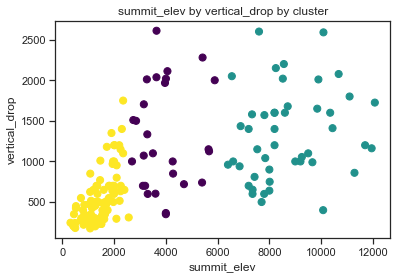

In [225]:
plt.scatter(step3_output['summit_elev'], step3_output['vertical_drop'], c=step3_output['cluster'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

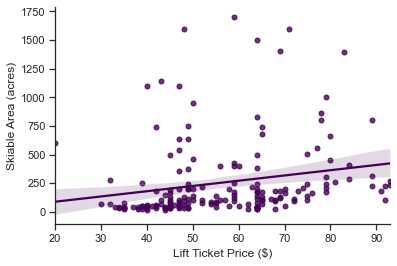

In [226]:

#"#440154FF" "#21908CFF" "#FDE725FF"
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=step3_outputdf[(step3_outputdf['SkiableTerrain_ac']<25000)], color ="#440154FF",scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=ac, c='white',s=200,edgecolors='black')
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Skiable Area (acres)')
plt.savefig('figures/fig2.png',bbox_inches='tight')

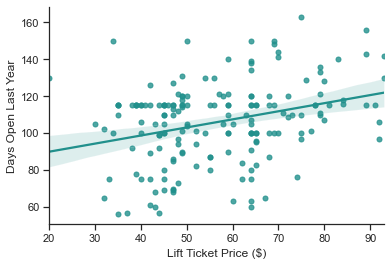

In [227]:
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=step3_outputdf,color ="#21908CFF",scatter_kws={"s": 25})
sns.despine()
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=ac, c='white',s=200,edgecolors='black')
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.savefig('figures/fig3.png',bbox_inches='tight')

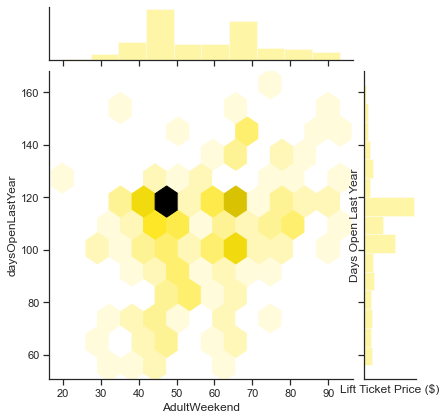

In [228]:
sns.set(style="ticks")
sns.jointplot(x=step3_outputdf['AdultWeekend'], y=step3_outputdf['daysOpenLastYear'], kind="hex", color="#FDE725FF")
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [229]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [230]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('models/model_metrics.csv',index=False)